In [28]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.


In [29]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [30]:
# Step 1: Define state structure
class SpeedState(TypedDict):
    distance_km: float
    time_hr: float
    speed: float
    category: str

In [31]:
# Step 2: Speed Formula Node
def calculate_speed(state: SpeedState) -> SpeedState:
    speed = state["distance_km"] / state["time_hr"]
    state["speed"] = round(speed, 2)
    return state


In [32]:
# Step 3: Speed Category Router
def categorize_speed(state: SpeedState) -> SpeedState:
    speed = state["speed"]
    if speed < 20:
        category = "🐢 Slow"
    elif speed <= 60:
        category = "🚗 Normal"
    else:
        category = "🚀 Fast"
    state["category"] = category
    return state

In [ ]:
# Step 4: Create the graph
graph = StateGraph(SpeedState)

# Add Nodes
graph.add_node("SpeedCalc", calculate_speed)
graph.add_node("Categorize", categorize_speed)

# Add Edges
graph.add_edge(START, "SpeedCalc")
graph.add_edge("SpeedCalc", "Categorize")
graph.add_edge("Categorize", END)

In [ ]:
# Step 5: Compile the Graph
workflow = graph.compile()

In [ ]:
# Step 6: Execute the Graph
intial_state = {'distance_km':120, 'time_hr':2}

result = workflow.invoke(intial_state)
print(result)

{'distance_km': 120, 'time_hr': 2, 'speed': 60.0, 'category': '🚗 Normal'}


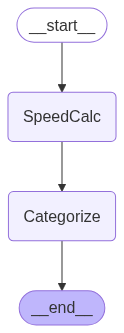

In [38]:
# Draw the Graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())